In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from datetime import datetime

matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)
plt.style.use(['fivethirtyeight'])
import seaborn as sns



from scipy import stats
import scipy.stats
from scipy.stats import shapiro
from scipy.stats import bartlett, levene
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse

from sklearn.tree import export_graphviz

import graphviz
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from IPython.core.display import display, HTML
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering,KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from dask.diagnostics import ProgressBar
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, f1_score, roc_curve, auc, precision_score,recall_score


display(HTML("<style>.container { width:100% !important; }</style>"))

In [59]:
df = pd.read_csv('final_merged_dataset.csv')

In [60]:
df

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,...,Furance_Temp,RTA_Temp,count_ion,Target,Error_message,Wafer_map,chamber_total_count,chamber_path,defective,defective_chip_rate
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,...,854.0,154,582,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0705
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,...,895.0,156,542,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2819,21122,0,0.0275
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,...,898.0,152,550,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2847,21133,0,0.0480
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,...,879.0,155,582,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0525
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,...,882.0,155,542,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2819,21122,0,0.0395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,NOLSM3081211,1,Oxidation,dry,1160.350439,O2,34.56,0.199,18,710.197,...,883.0,153,582,105,none,[[0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 0 0 0 0 0 0 ...,2902,13311,0,0.0525
1654,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,...,867.0,152,550,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2878,11133,0,0.0210
1655,NOLSM8503213,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21,712.946,...,868.0,152,542,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2821,11222,0,0.0210
1656,NOLSM8513214,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20,711.987,...,868.0,152,582,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2938,11311,0,0.0120


In [51]:
df

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,...,Furance_Temp,RTA_Temp,count_ion,Target,Error_message,Wafer_map,chamber_total_count,chamber_path,defective,defective_chip_rate
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,...,854.0,154,582,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0705
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,...,895.0,156,542,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2819,21122,0,0.0275
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,...,898.0,152,550,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2847,21133,0,0.0480
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,...,879.0,155,582,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0525
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,...,882.0,155,542,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2819,21122,0,0.0395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,NOLSM3081211,1,Oxidation,dry,1160.350439,O2,34.56,0.199,18,710.197,...,883.0,153,582,105,none,[[0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 0 0 0 0 0 0 ...,2902,13311,0,0.0525
1654,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,...,867.0,152,550,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2878,11133,0,0.0210
1655,NOLSM8503213,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21,712.946,...,868.0,152,542,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2821,11222,0,0.0210
1656,NOLSM8513214,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20,711.987,...,868.0,152,582,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2938,11311,0,0.0120


In [72]:
df.columns

Index(['No_Die', 'Ox_Chamber', 'process', 'type', 'Temp_OXid', 'Vapor', 'ppm',
       'Pressure', 'Oxid_time', 'thickness', 'Lot_Num', 'Wafer_Num',
       'Datetime', 'count_oxid', 'photo_soft_Chamber', 'process 2',
       'resist_target', 'N2_HMDS', 'pressure_HMDS', 'temp_HMDS',
       'temp_HMDS_bake', 'time_HMDS_bake', 'spin1', 'spin2', 'spin3',
       'photoresist_bake', 'temp_softbake', 'time_softbake', 'count_soft',
       'lithography_Chamber', 'Process 2-1', 'Line_CD', 'UV_type',
       'Wavelength', 'Resolution', 'Energy_Exposure', 'count_litho',
       'Etching_Chamber', 'Process 3', 'Thin F4', 'Thin F3', 'Thin F2',
       'Thin F1', 'Temp_Etching', 'Source_Power', 'Selectivity',
       'count_etching', 'Chamber_Num', 'process4', 'Flux60s', 'Flux90s',
       'Flux160s', 'Flux480s', 'Flux840s', 'input_Energy', 'Temp_implantation',
       'Furance_Temp', 'RTA_Temp', 'count_ion', 'Target', 'Error_message',
       'Wafer_map', 'chamber_total_count', 'chamber_path', 'defective',
 

In [73]:
oxidation_vari_mann = ['Pressure', 'Temp_OXid', 'ppm', 'Oxid_time']
Photo_lithograpy_vari_mann = ['Wavelength','Resolution','Energy_Exposure']
Photo_softbake_vari_mann = ['N2_HMDS', 'pressure_HMDS', 'temp_HMDS','temp_HMDS_bake', 'time_HMDS_bake', 'spin1', 'spin2', 'spin3','photoresist_bake', 'temp_softbake', 'time_softbake']
Etiching_vari_mann = ["Source_Power", "Selectivity", "Temp_Etching"]
Ion_Implantation_vari_mann = ['Flux60s', 'Flux90s', 'Flux160s', 'Flux480s', 'Flux840s', 'input_Energy', 'Temp_implantation', 'Furance_Temp', 'RTA_Temp']

In [74]:
vari_mann = []

vari_mann.extend(oxidation_vari_mann)
vari_mann.extend(Photo_lithograpy_vari_mann)
vari_mann.extend(Photo_softbake_vari_mann)
vari_mann.extend(Etiching_vari_mann)
vari_mann.extend(Ion_Implantation_vari_mann)

vari_mann

['Pressure',
 'Temp_OXid',
 'ppm',
 'Oxid_time',
 'Wavelength',
 'Resolution',
 'Energy_Exposure',
 'N2_HMDS',
 'pressure_HMDS',
 'temp_HMDS',
 'temp_HMDS_bake',
 'time_HMDS_bake',
 'spin1',
 'spin2',
 'spin3',
 'photoresist_bake',
 'temp_softbake',
 'time_softbake',
 'Source_Power',
 'Selectivity',
 'Temp_Etching',
 'Flux60s',
 'Flux90s',
 'Flux160s',
 'Flux480s',
 'Flux840s',
 'input_Energy',
 'Temp_implantation',
 'Furance_Temp',
 'RTA_Temp']

--------------------------------------------------
********** Pressure 변수에 대한 유의성검정 **********
Pressure 변수의 불량에 대한 Boxplot


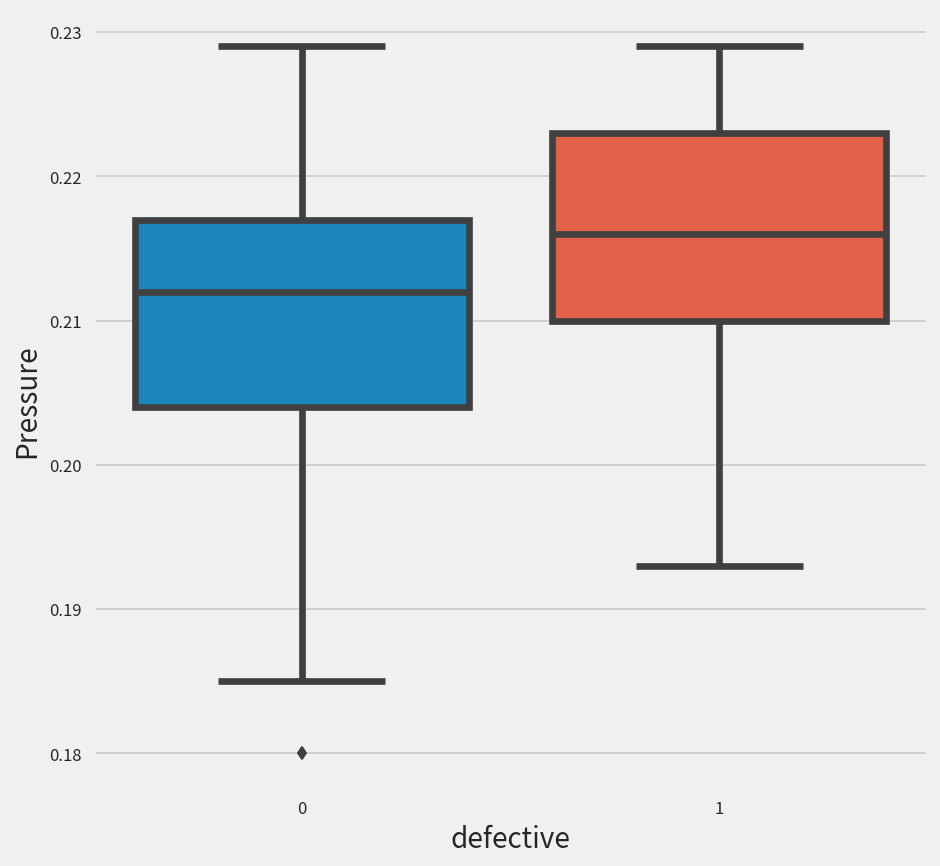


Pressure 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=64477.5, pvalue=1.838480205779668e-08)


--------------------------------------------------
********** Temp_OXid 변수에 대한 유의성검정 **********
Temp_OXid 변수의 불량에 대한 Boxplot


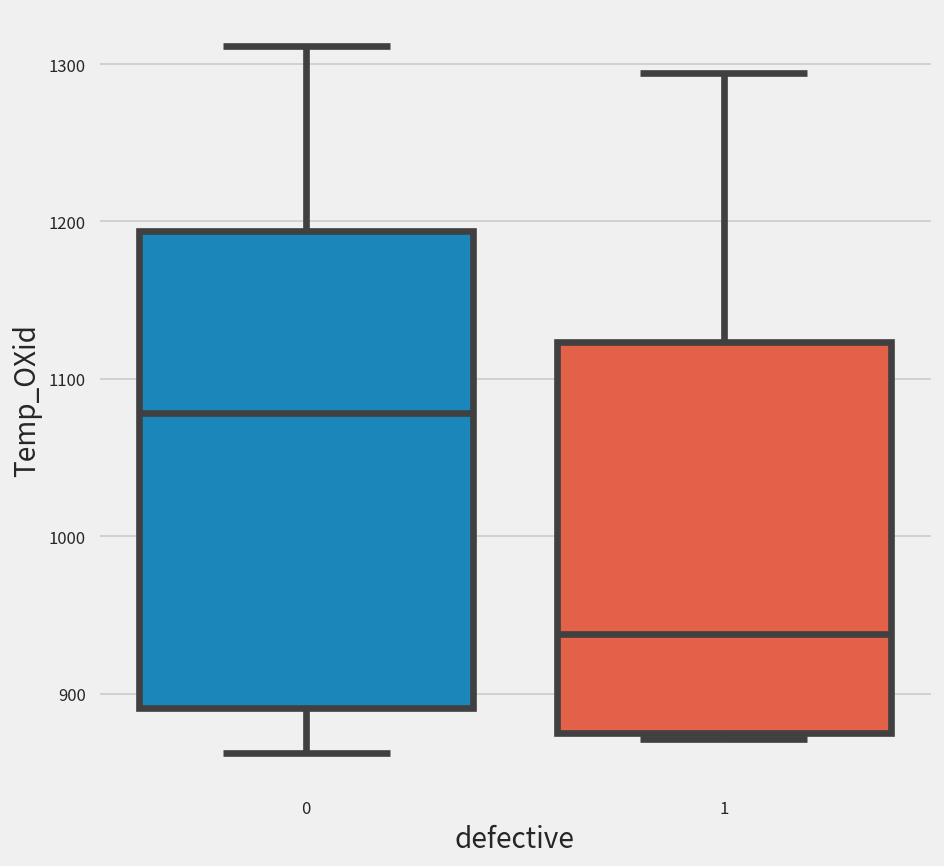


Temp_OXid 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=115709.0, pvalue=7.439765119209319e-06)


--------------------------------------------------
********** ppm 변수에 대한 유의성검정 **********
ppm 변수의 불량에 대한 Boxplot


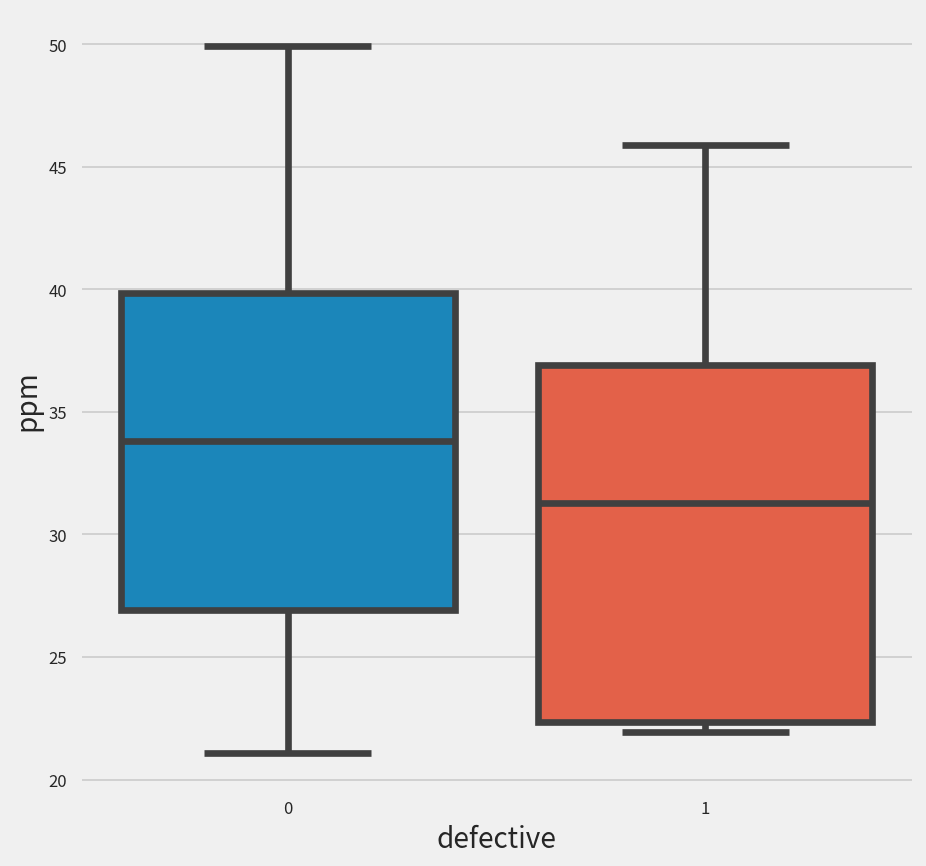


ppm 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=106542.0, pvalue=0.007519776525813992)


--------------------------------------------------
********** Oxid_time 변수에 대한 유의성검정 **********
Oxid_time 변수의 불량에 대한 Boxplot


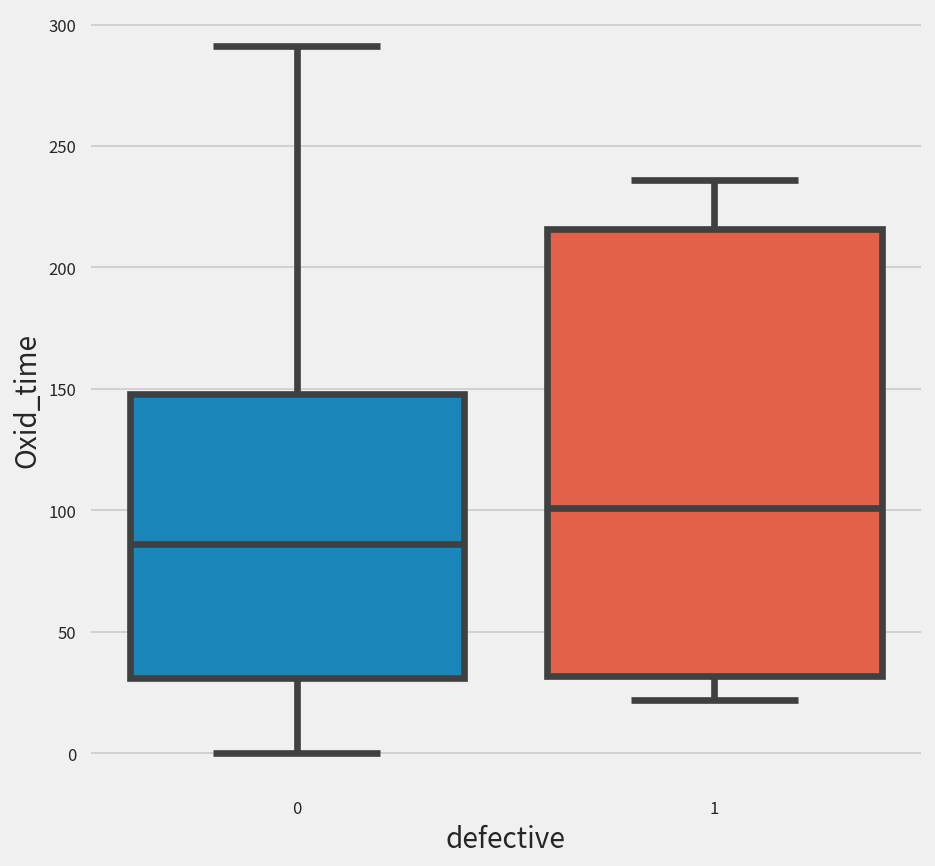


Oxid_time 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=83065.0, pvalue=0.050278281588177126)


--------------------------------------------------
********** Wavelength 변수에 대한 유의성검정 **********
Wavelength 변수의 불량에 대한 Boxplot


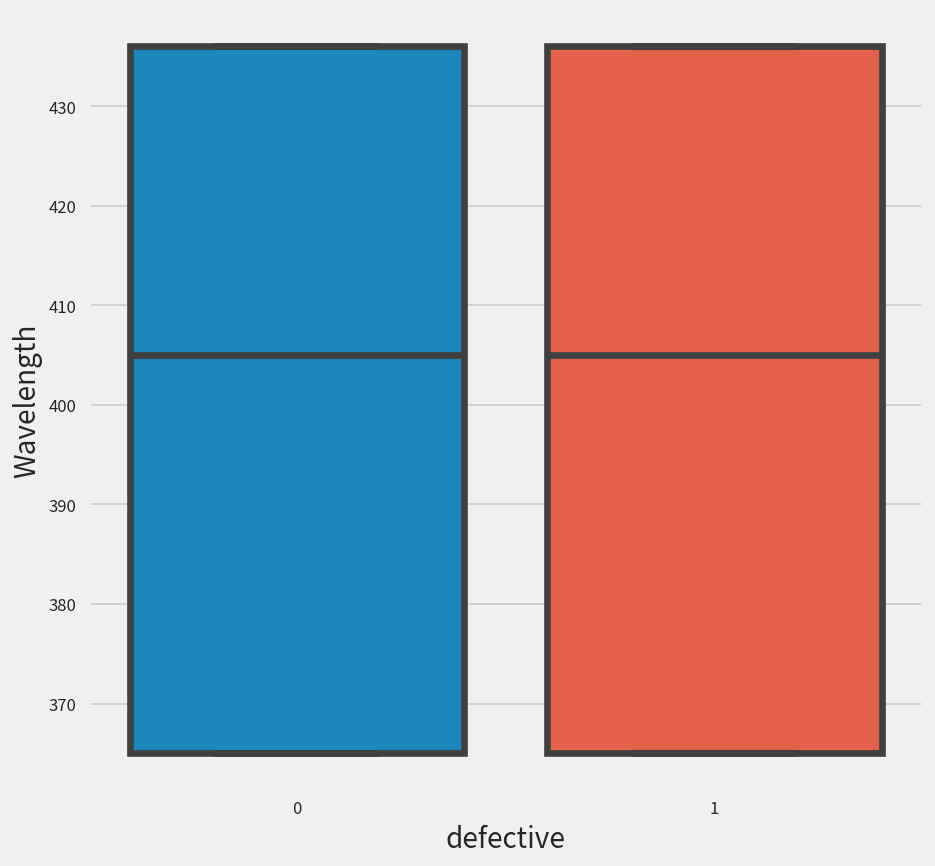


Wavelength 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=96840.5, pvalue=0.4198288513812436)


--------------------------------------------------
********** Resolution 변수에 대한 유의성검정 **********
Resolution 변수의 불량에 대한 Boxplot


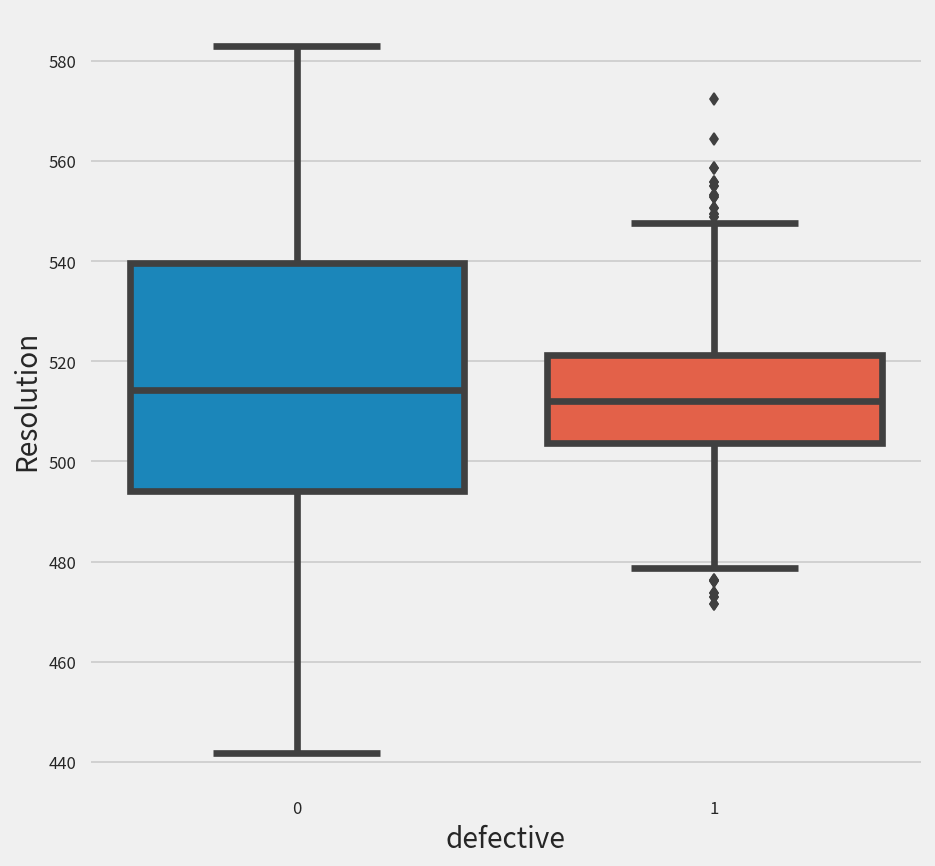


Resolution 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=94289.0, pvalue=0.7976586213553413)


--------------------------------------------------
********** Energy_Exposure 변수에 대한 유의성검정 **********
Energy_Exposure 변수의 불량에 대한 Boxplot


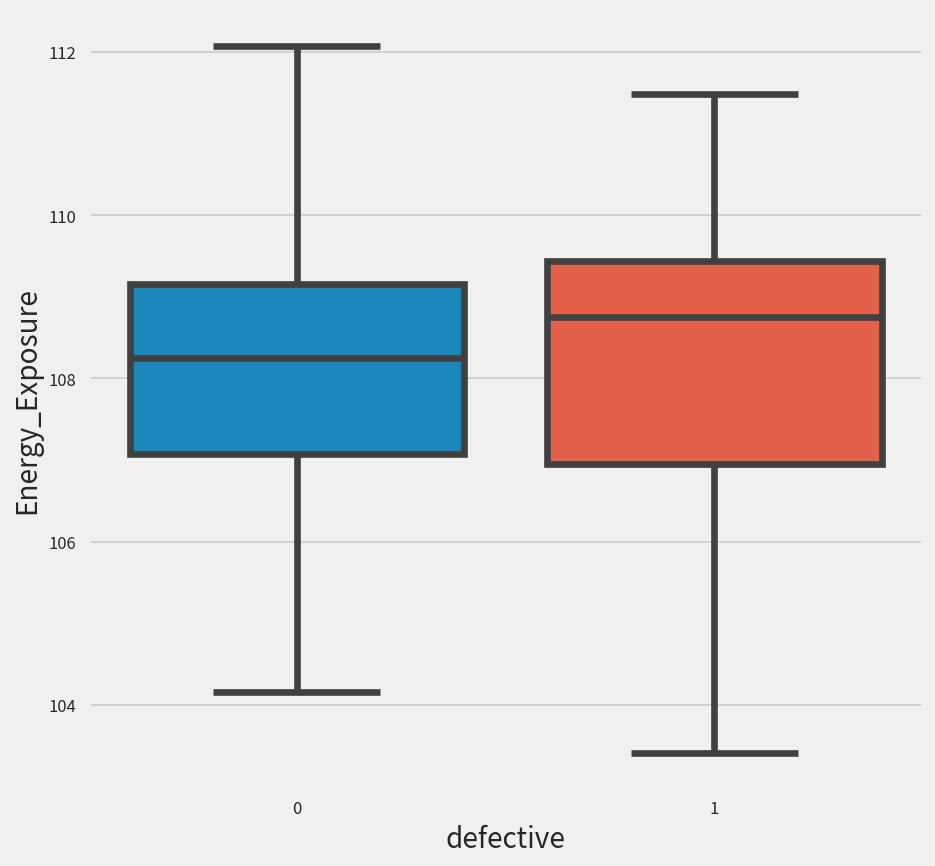


Energy_Exposure 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=83055.0, pvalue=0.05012112818924575)


--------------------------------------------------
********** N2_HMDS 변수에 대한 유의성검정 **********
N2_HMDS 변수의 불량에 대한 Boxplot


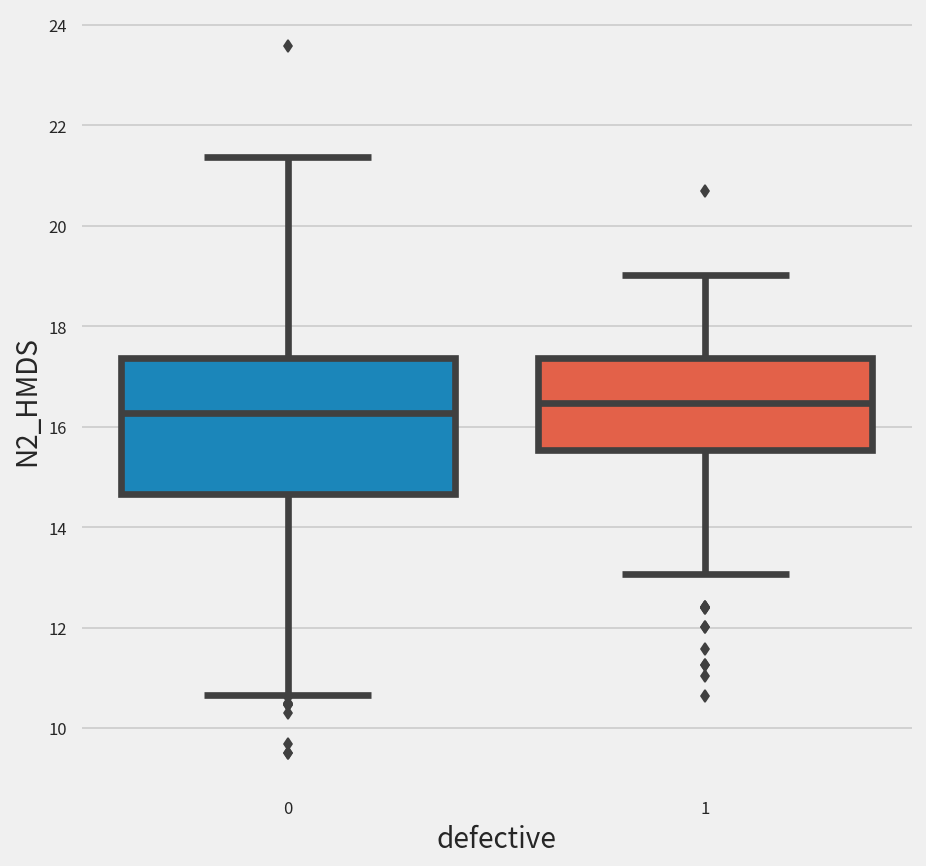


N2_HMDS 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=87627.5, pvalue=0.29042511682522987)


--------------------------------------------------
********** pressure_HMDS 변수에 대한 유의성검정 **********
pressure_HMDS 변수의 불량에 대한 Boxplot


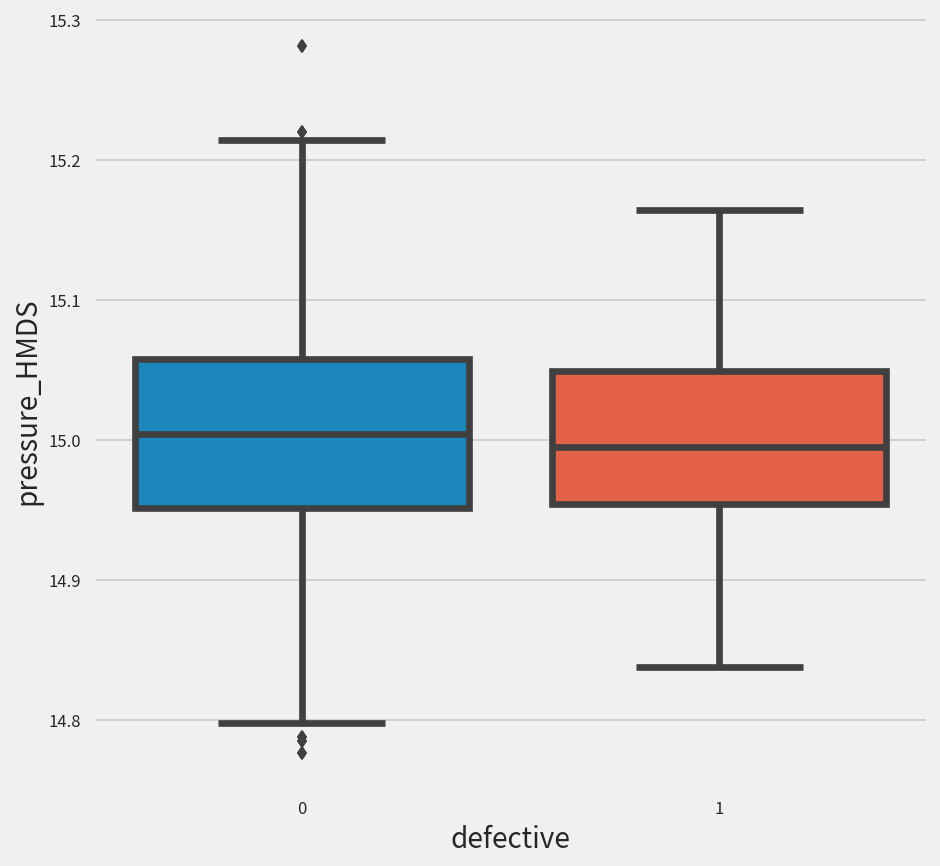


pressure_HMDS 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=93864.5, pvalue=0.8629155021090325)


--------------------------------------------------
********** temp_HMDS 변수에 대한 유의성검정 **********
temp_HMDS 변수의 불량에 대한 Boxplot


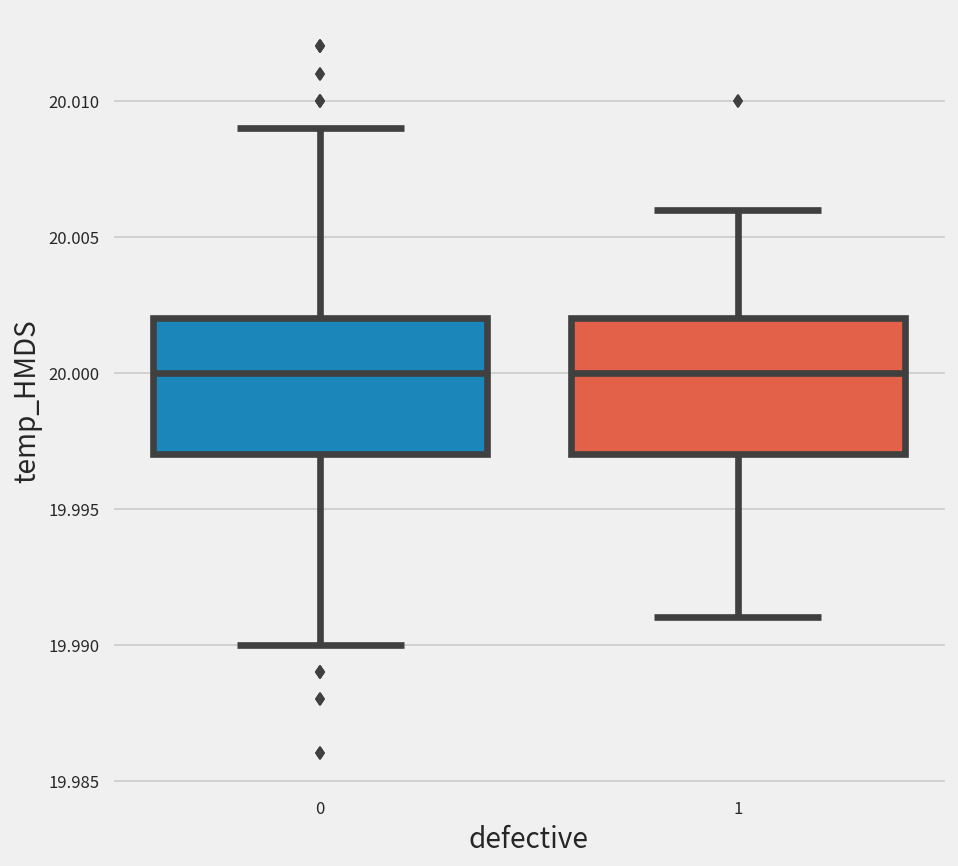


temp_HMDS 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=87896.5, pvalue=0.3135283032670262)


--------------------------------------------------
********** temp_HMDS_bake 변수에 대한 유의성검정 **********
temp_HMDS_bake 변수의 불량에 대한 Boxplot


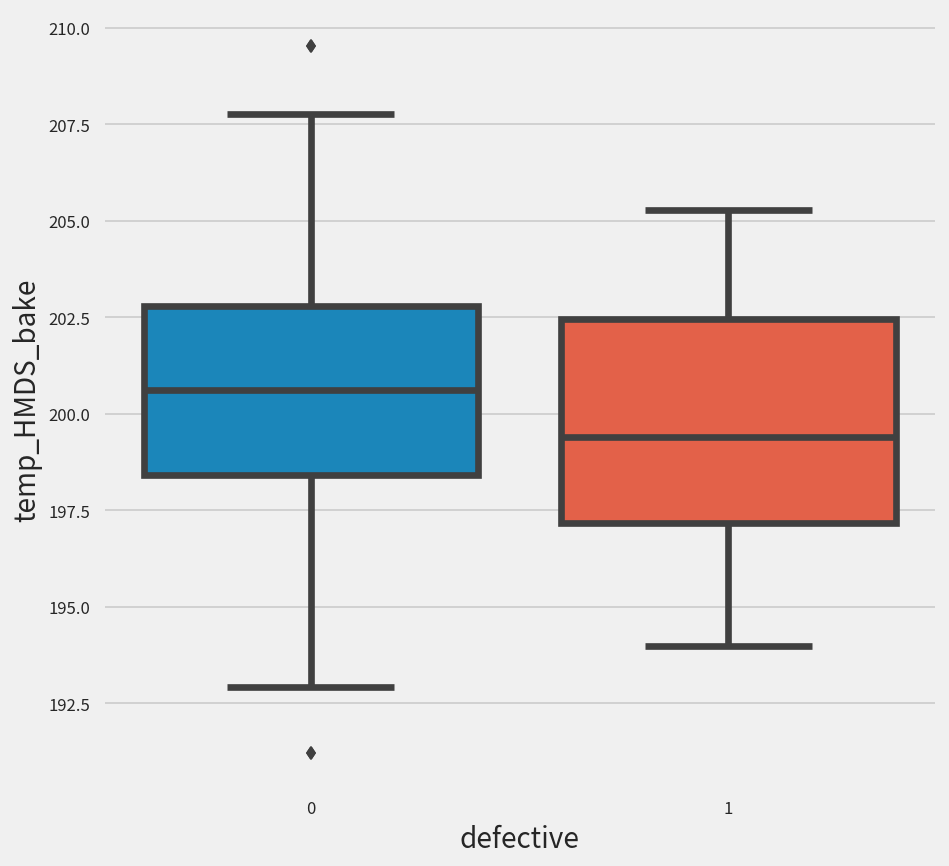


temp_HMDS_bake 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=106904.0, pvalue=0.006065098546014774)


--------------------------------------------------
********** time_HMDS_bake 변수에 대한 유의성검정 **********
time_HMDS_bake 변수의 불량에 대한 Boxplot


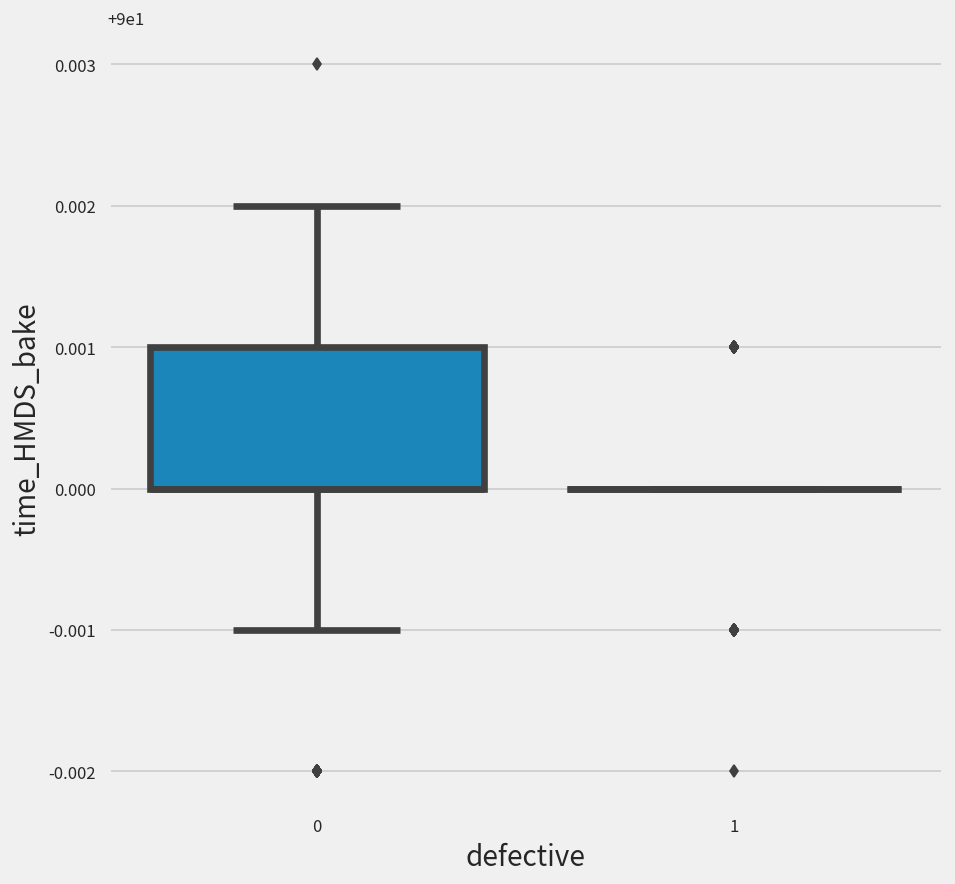


time_HMDS_bake 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=97214.5, pvalue=0.36255494923601084)


--------------------------------------------------
********** spin1 변수에 대한 유의성검정 **********
spin1 변수의 불량에 대한 Boxplot


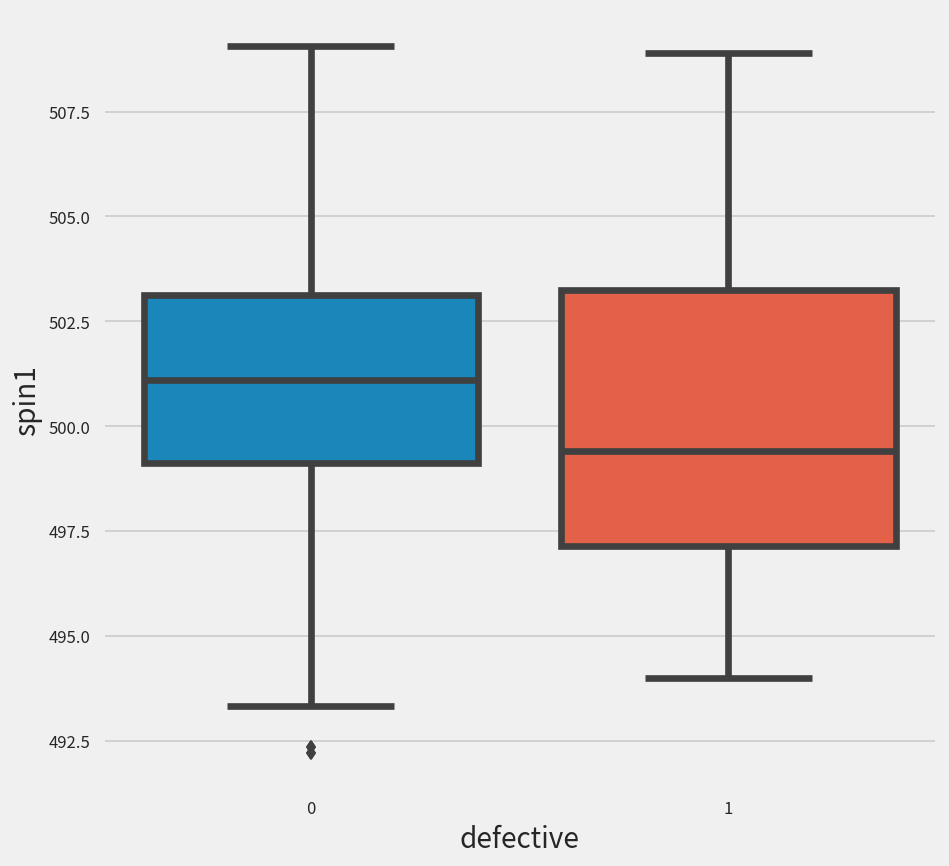


spin1 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=110429.5, pvalue=0.0005827171632922249)


--------------------------------------------------
********** spin2 변수에 대한 유의성검정 **********
spin2 변수의 불량에 대한 Boxplot


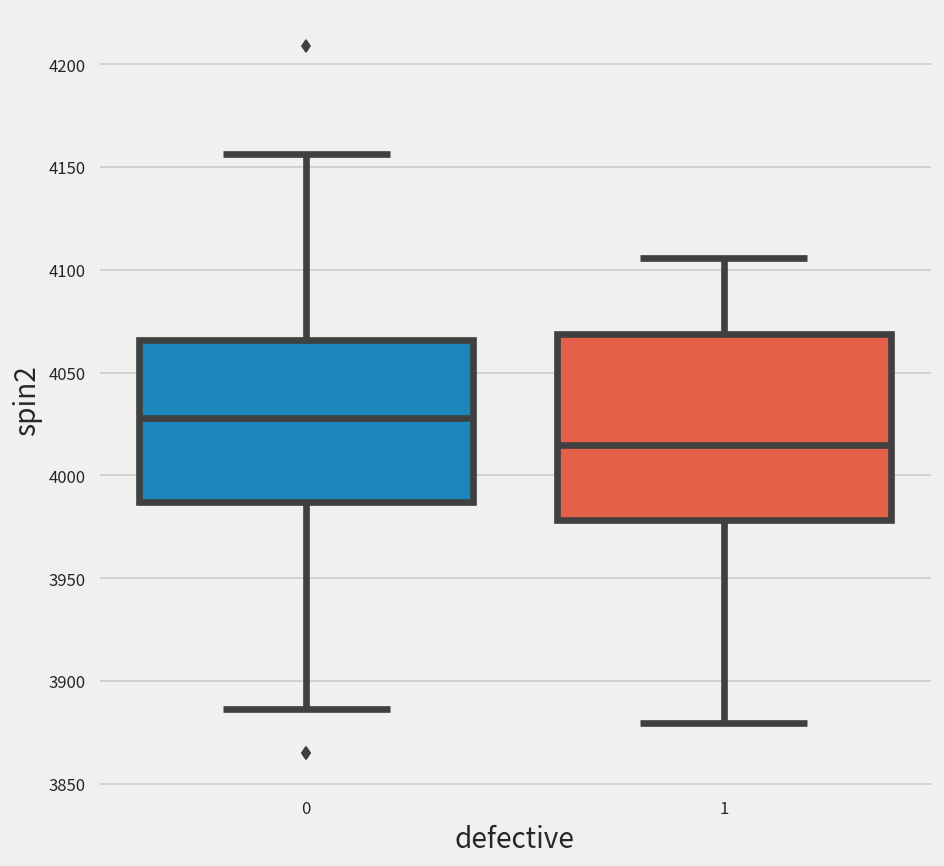


spin2 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=102667.5, pvalue=0.05629413685206353)


--------------------------------------------------
********** spin3 변수에 대한 유의성검정 **********
spin3 변수의 불량에 대한 Boxplot


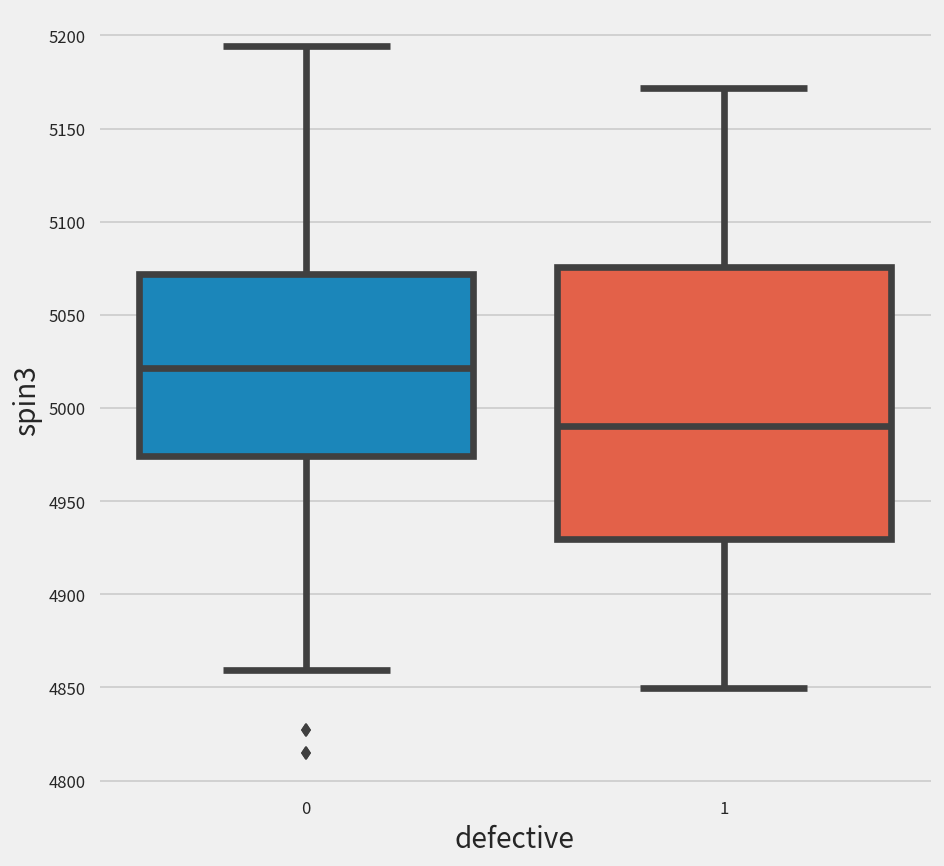


spin3 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=108328.0, pvalue=0.0024857749427266707)


--------------------------------------------------
********** photoresist_bake 변수에 대한 유의성검정 **********
photoresist_bake 변수의 불량에 대한 Boxplot


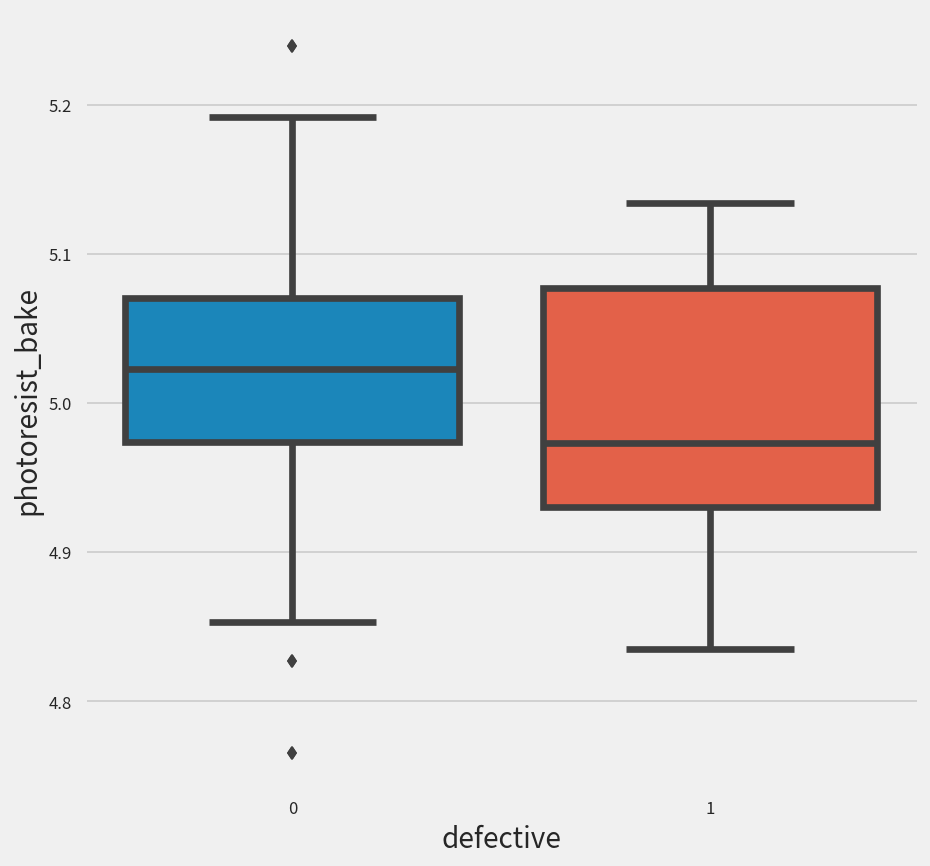


photoresist_bake 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=113180.0, pvalue=6.83341624204524e-05)


--------------------------------------------------
********** temp_softbake 변수에 대한 유의성검정 **********
temp_softbake 변수의 불량에 대한 Boxplot


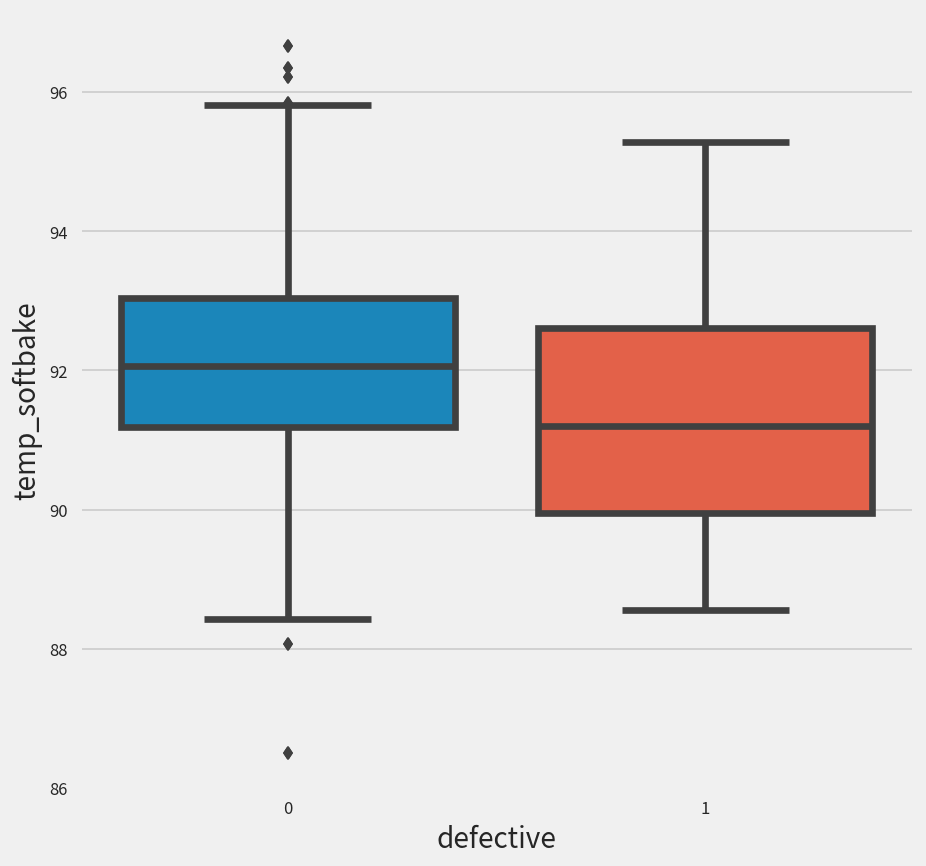


temp_softbake 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=115734.0, pvalue=7.269627476542732e-06)


--------------------------------------------------
********** time_softbake 변수에 대한 유의성검정 **********
time_softbake 변수의 불량에 대한 Boxplot


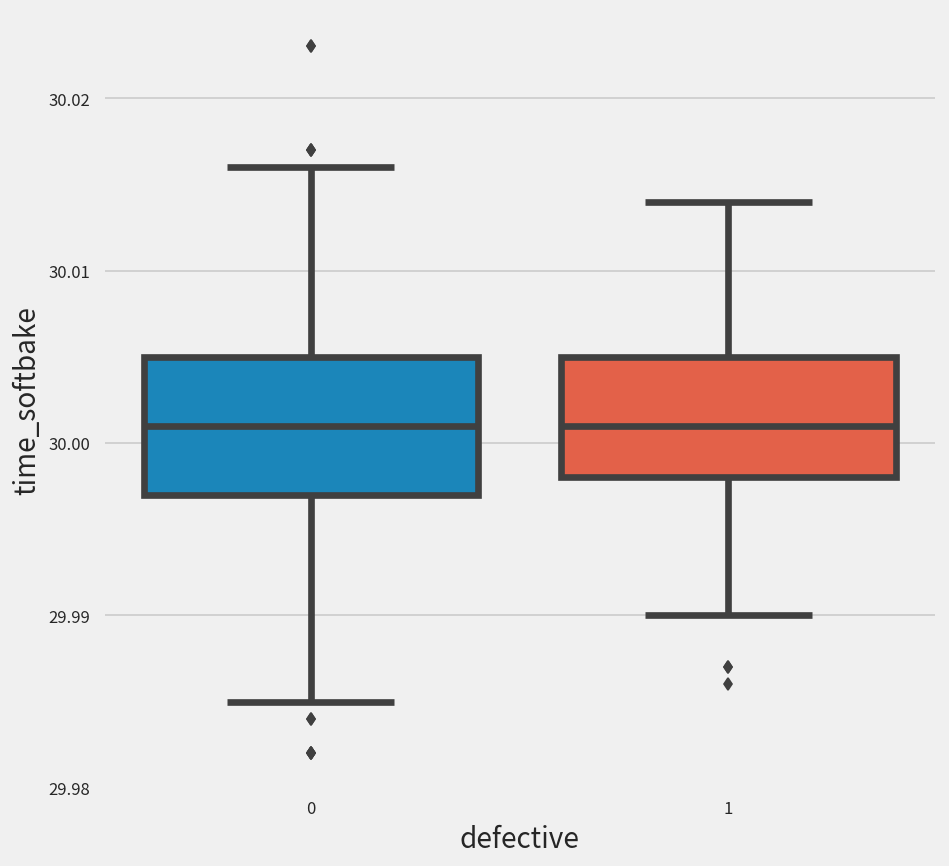


time_softbake 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=87347.5, pvalue=0.26535396712348747)


--------------------------------------------------
********** Source_Power 변수에 대한 유의성검정 **********
Source_Power 변수의 불량에 대한 Boxplot


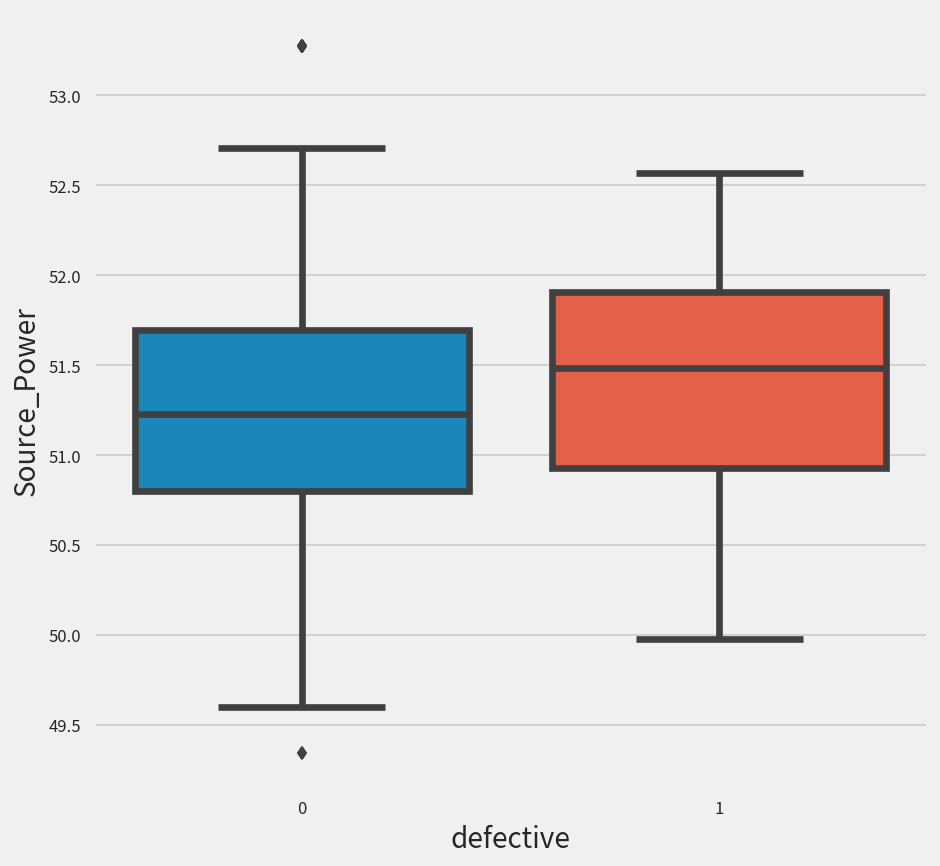


Source_Power 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=78442.0, pvalue=0.004121861046064176)


--------------------------------------------------
********** Selectivity 변수에 대한 유의성검정 **********
Selectivity 변수의 불량에 대한 Boxplot


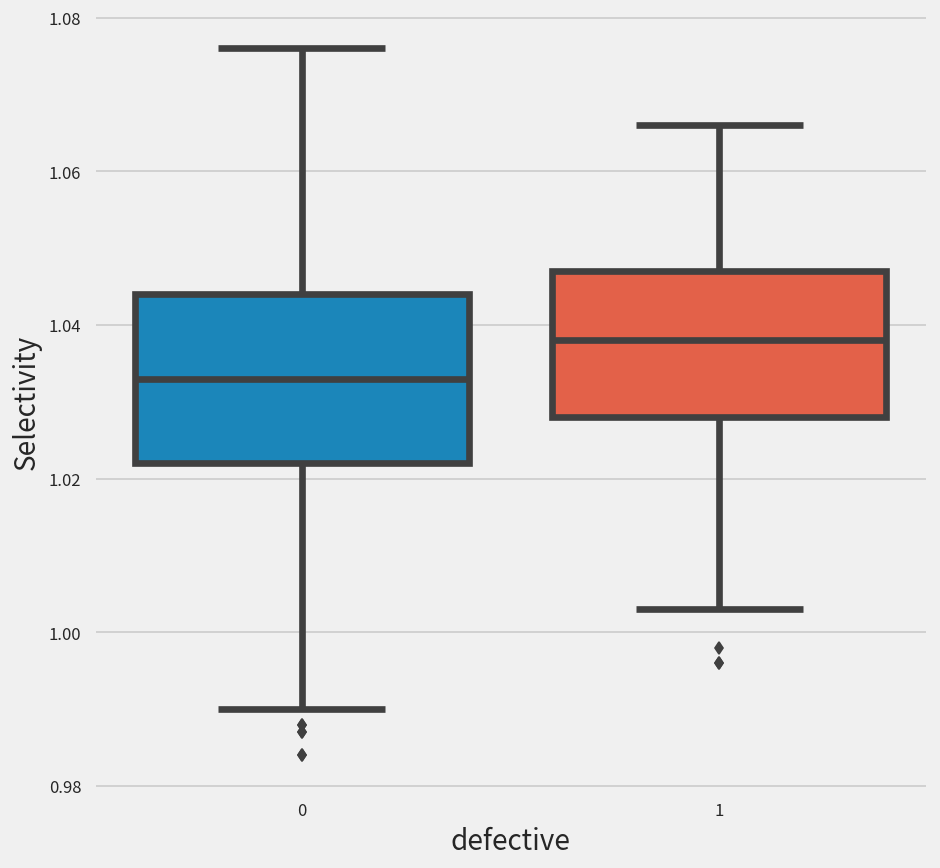


Selectivity 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=77778.5, pvalue=0.002698746013693261)


--------------------------------------------------
********** Temp_Etching 변수에 대한 유의성검정 **********
Temp_Etching 변수의 불량에 대한 Boxplot


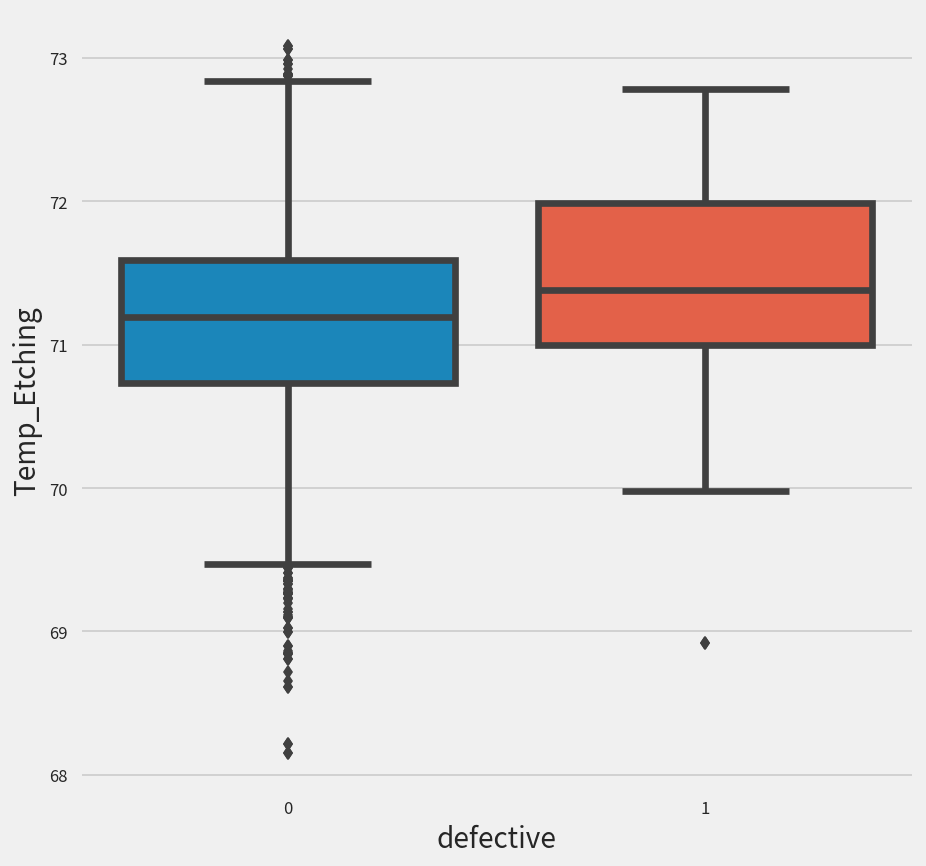


Temp_Etching 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=74370.0, pvalue=0.00024090453372375455)


--------------------------------------------------
********** Flux60s 변수에 대한 유의성검정 **********
Flux60s 변수의 불량에 대한 Boxplot


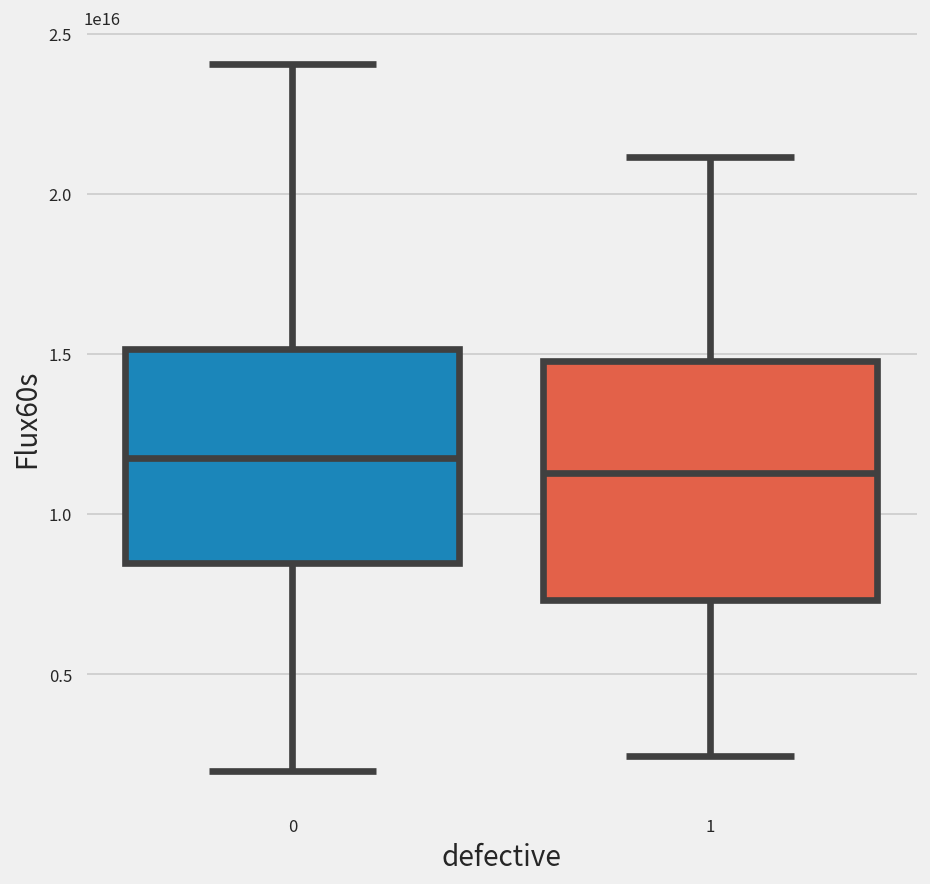


Flux60s 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=99518.0, pvalue=0.1978812336490967)


--------------------------------------------------
********** Flux90s 변수에 대한 유의성검정 **********
Flux90s 변수의 불량에 대한 Boxplot


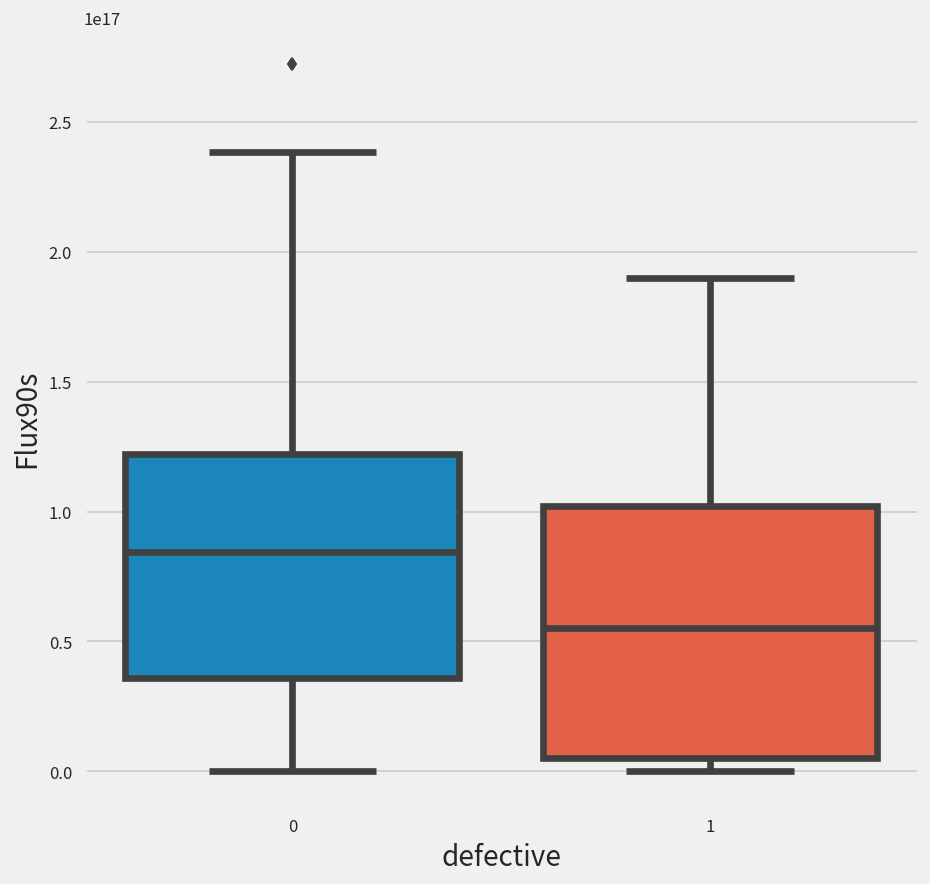


Flux90s 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=113969.0, pvalue=3.5102976885831786e-05)


--------------------------------------------------
********** Flux160s 변수에 대한 유의성검정 **********
Flux160s 변수의 불량에 대한 Boxplot


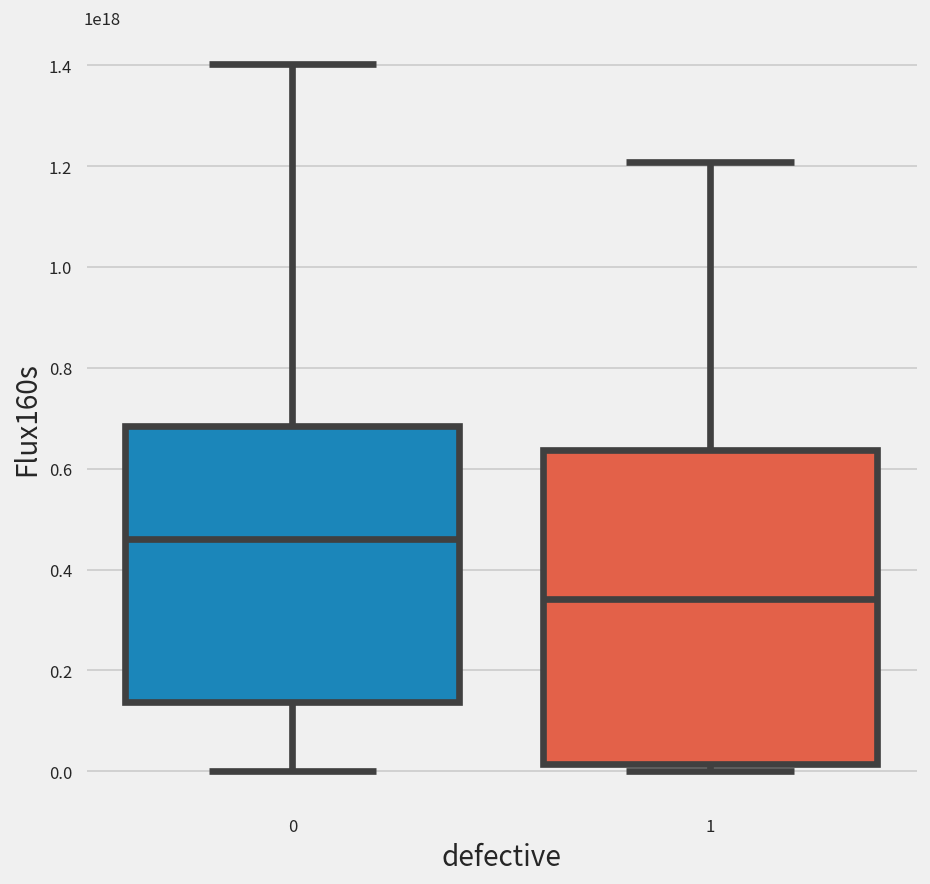


Flux160s 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=109645.5, pvalue=0.001020194720011234)


--------------------------------------------------
********** Flux480s 변수에 대한 유의성검정 **********
Flux480s 변수의 불량에 대한 Boxplot


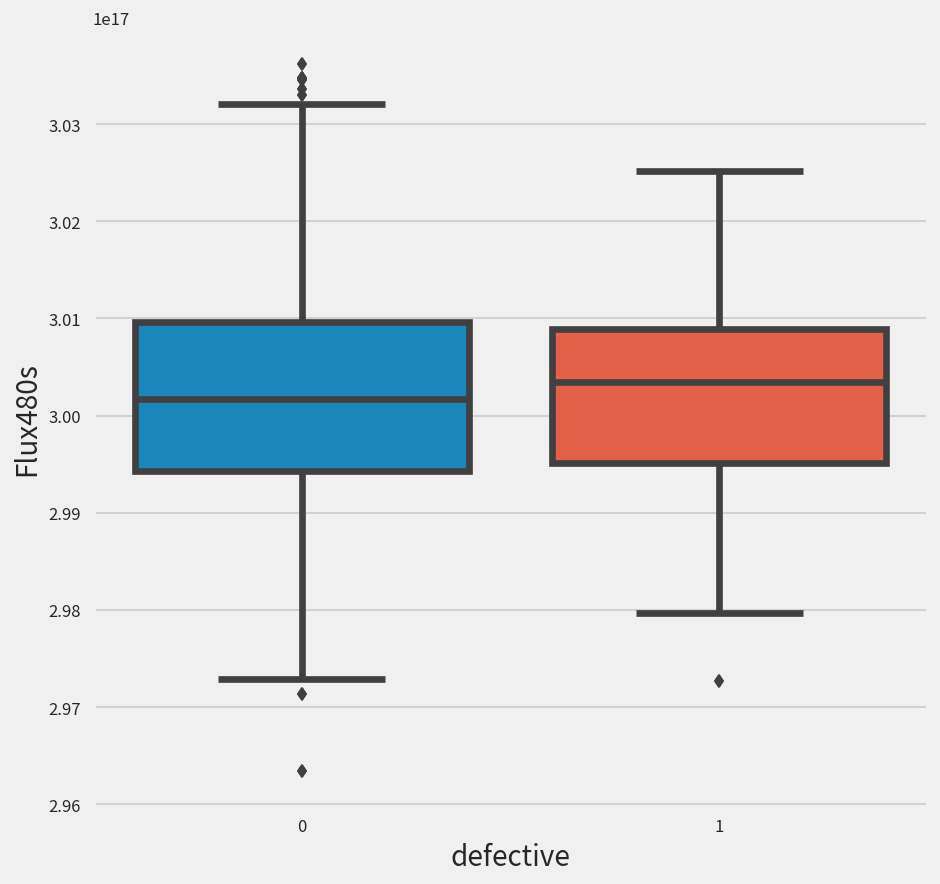


Flux480s 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=92151.0, pvalue=0.868890267899263)


--------------------------------------------------
********** Flux840s 변수에 대한 유의성검정 **********
Flux840s 변수의 불량에 대한 Boxplot


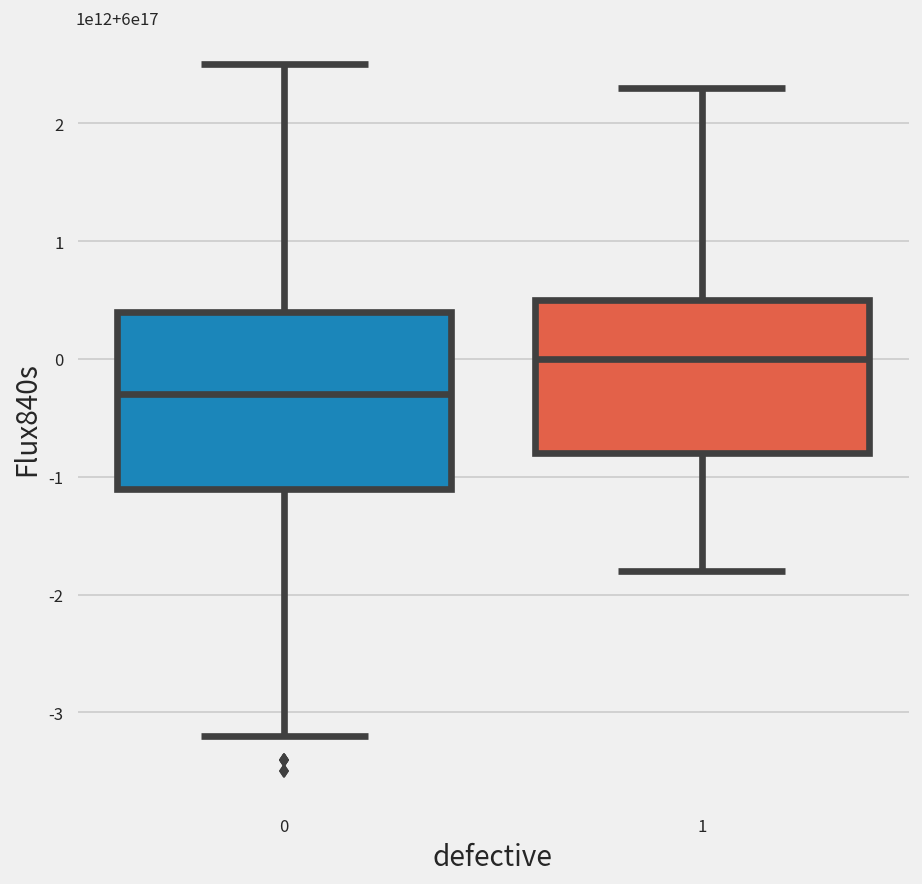


Flux840s 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=82768.5, pvalue=0.04376328230318184)


--------------------------------------------------
********** input_Energy 변수에 대한 유의성검정 **********
input_Energy 변수의 불량에 대한 Boxplot


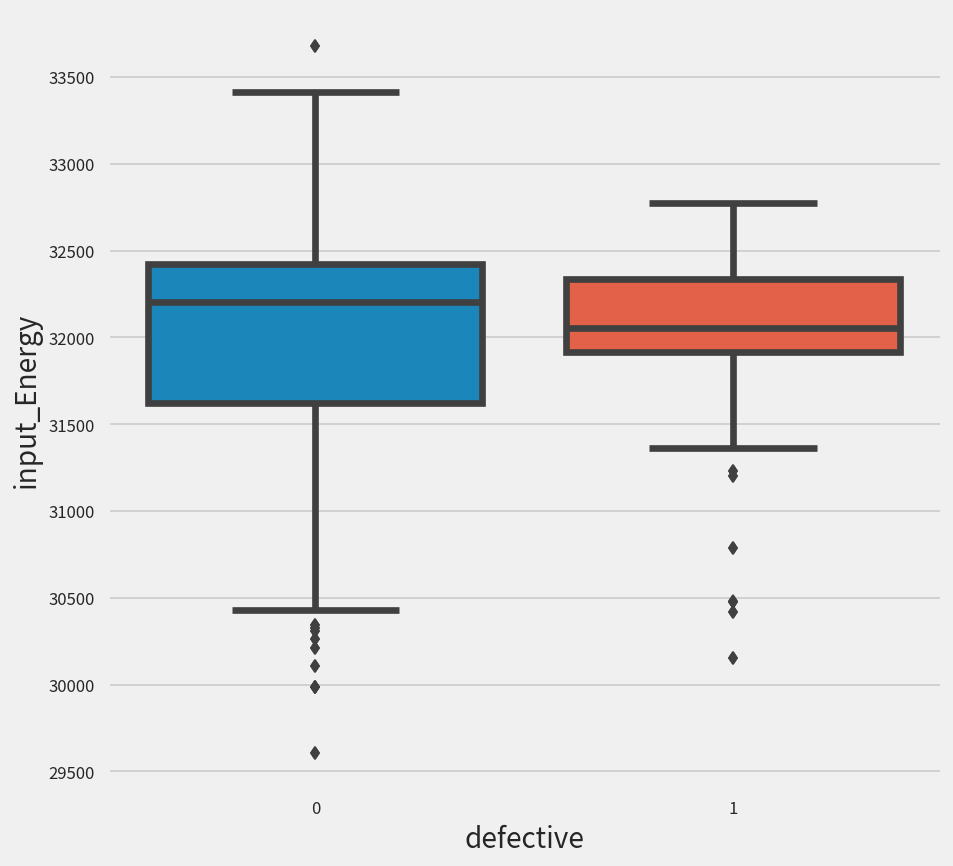


input_Energy 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=96180.0, pvalue=0.5291459196898629)


--------------------------------------------------
********** Temp_implantation 변수에 대한 유의성검정 **********
Temp_implantation 변수의 불량에 대한 Boxplot


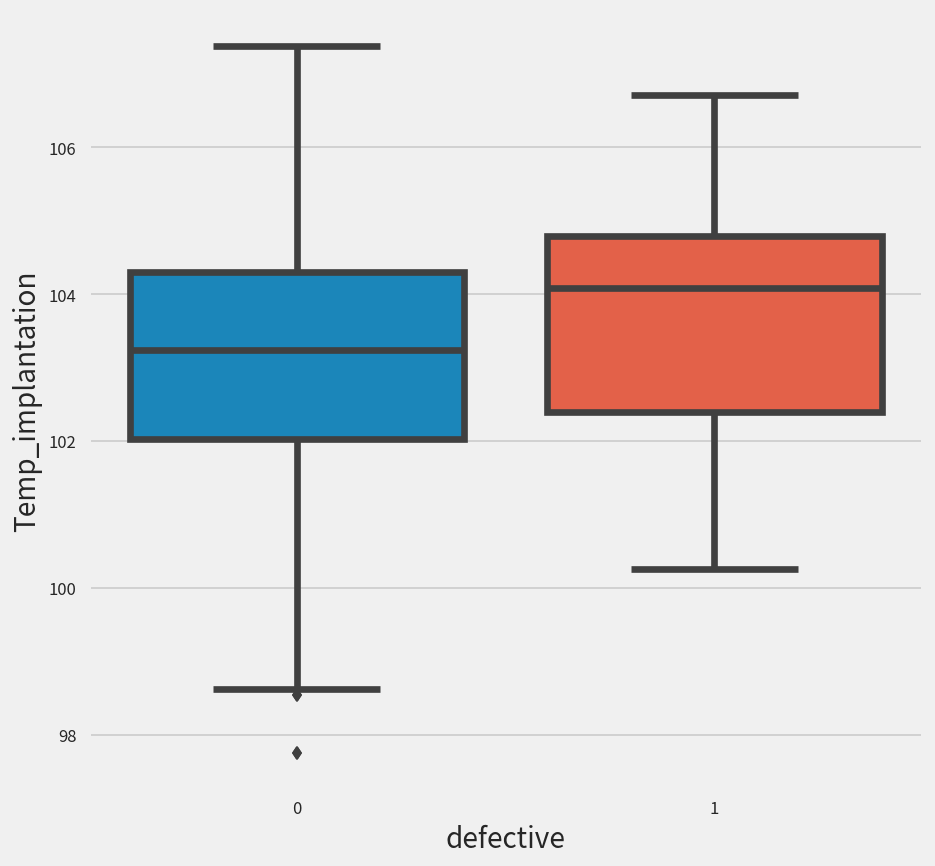


Temp_implantation 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=75434.0, pvalue=0.0005363793964037048)


--------------------------------------------------
********** Furance_Temp 변수에 대한 유의성검정 **********
Furance_Temp 변수의 불량에 대한 Boxplot


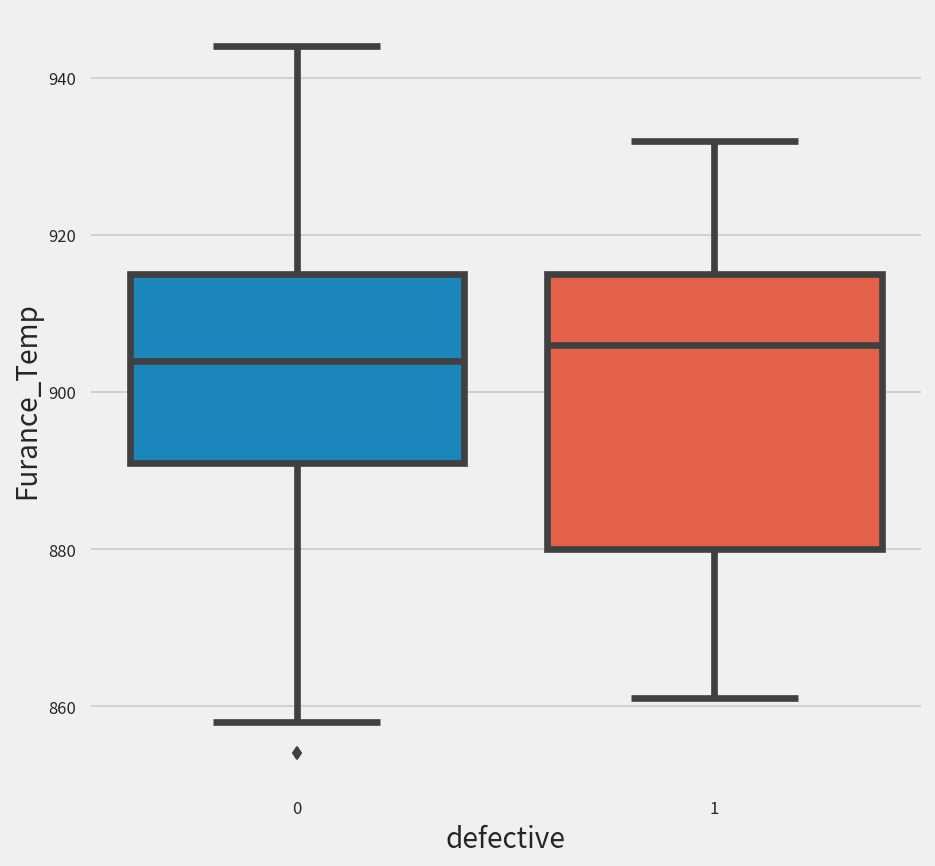


Furance_Temp 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=98551.5, pvalue=0.2725332831922024)


--------------------------------------------------
********** RTA_Temp 변수에 대한 유의성검정 **********
RTA_Temp 변수의 불량에 대한 Boxplot


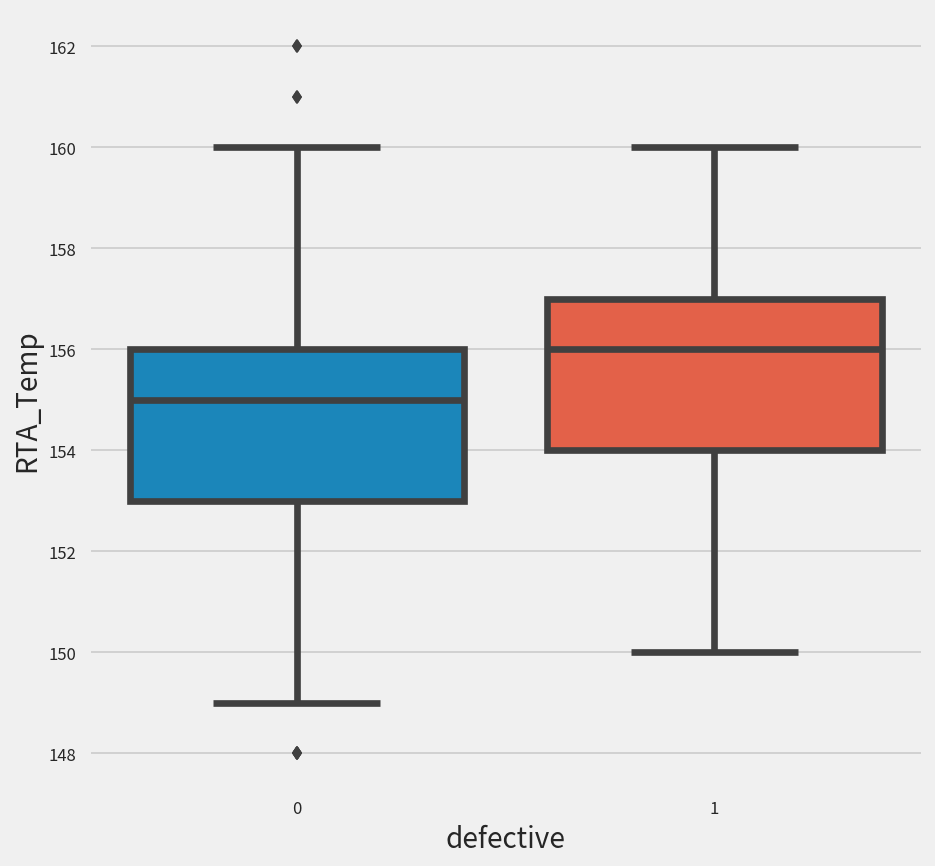


RTA_Temp 변수의 불량에 대한 mann-whitney-U test 결과
MannwhitneyuResult(statistic=80317.5, pvalue=0.011771174074927235)




In [76]:
for i in vari_mann:
    print('-'*50)
    print('*'*10, i, '변수에 대한 유의성검정', '*'*10)
    print(i, '변수의 불량에 대한 Boxplot')
    temp_df = df[[i, 'defective']]

    # 1이 불량
    
    ## 수치형 변수 boxplot
    plt.figure(dpi=120, figsize = (8,8))
    sns.boxplot(x = 'defective', y = i, data = temp_df)
    plt.show()
    print()
    ## 수치형 변수 유의성검정
    print(i, '변수의 불량에 대한 mann-whitney-U test 결과')
    test_df0 = temp_df.loc[temp_df['defective'] == 0, i]
    test_df1 = temp_df.loc[temp_df['defective'] == 1, i]
    print(stats.mannwhitneyu(test_df0, test_df1))
    print()
    print()